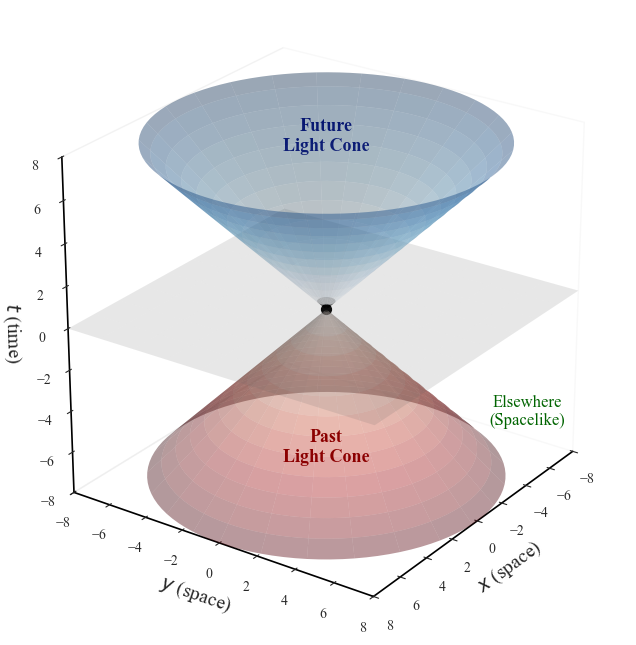

In [31]:
"""LIGHTCONE"""

import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# -------------------------------------------------------------------------
# FIGURE CONFIGURATION (academic / publication style)
# -------------------------------------------------------------------------
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "font.size": 14,
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "figure.titlesize": 18,
    "axes.edgecolor": "black",
    "axes.linewidth": 1.2
})

# Create figure and 3D axes
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# -------------------------------------------------------------------------
# DATA FOR LIGHT CONE
# -------------------------------------------------------------------------
t = np.linspace(-8, 8, 100)
theta = np.linspace(0, 2 * np.pi, 100)
t_grid, theta_grid = np.meshgrid(t, theta)

# Cone equation
r = np.abs(t_grid)
x = r * np.cos(theta_grid)
y = r * np.sin(theta_grid)

# Mask future/past regions
t_future = np.where(t_grid >= 0, t_grid, np.nan)
t_past = np.where(t_grid <= 0, t_grid, np.nan)

# -------------------------------------------------------------------------
# PLOT SURFACES
# -------------------------------------------------------------------------
# Future light cone (blue tone)
ax.plot_surface(
    x, y, t_future, rstride=4, cstride=4, alpha=0.4,
    facecolors=cm.Blues((t_future - np.nanmin(t_future)) / np.nanmax(t_future)),
    linewidth=0, antialiased=True
)

# Past light cone (red tone)
ax.plot_surface(
    x, y, t_past, rstride=4, cstride=4, alpha=0.4,
    facecolors=cm.Reds((np.abs(t_past) - np.nanmin(np.abs(t_past))) / np.nanmax(np.abs(t_past))),
    linewidth=0, antialiased=True
)

# Present plane (t = 0)
plane_x = np.linspace(-8, 8, 10)
plane_y = np.linspace(-8, 8, 10)
plane_xx, plane_yy = np.meshgrid(plane_x, plane_y)
plane_t = np.zeros_like(plane_xx)
ax.plot_surface(plane_xx, plane_yy, plane_t, color='gray', alpha=0.15)

# -------------------------------------------------------------------------
# LABELS & ANNOTATIONS
# -------------------------------------------------------------------------
ax.set_xlabel(r'$x$ (space)')
ax.set_ylabel(r'$y$ (space)')
ax.set_zlabel(r'$t$ (time)')

ax.text(0, 0, 7.5, 'Future\nLight Cone', color='navy', ha='center', fontsize=13, weight='bold')
ax.text(0, 0, -7.5, 'Past\nLight Cone', color='darkred', ha='center', fontsize=13, weight='bold')
ax.text(-4, 8, -5, 'Elsewhere\n(Spacelike)', color='darkgreen', ha='center', fontsize=12)

# The "present" event
ax.scatter(0, 0, 0, color='black', s=50, label='Present Event')

# -------------------------------------------------------------------------
# STYLING & VIEW
# -------------------------------------------------------------------------
ax.set_xlim([-8, 8])
ax.set_ylim([-8, 8])
ax.set_zlim([-8, 8])
ax.view_init(elev=25, azim=35)

# Clean ticks
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_box_aspect([1, 1, 1])  # Equal scale

# Minimal grid
ax.grid(False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False


# -------------------------------------------------------------------------
# SAVE FIGURE (SVG for publication)
# -------------------------------------------------------------------------
os.makedirs('Ch1', exist_ok=True)
plt.savefig('Ch1/LightCone.svg', format='svg', dpi=300, bbox_inches='tight')
plt.show()


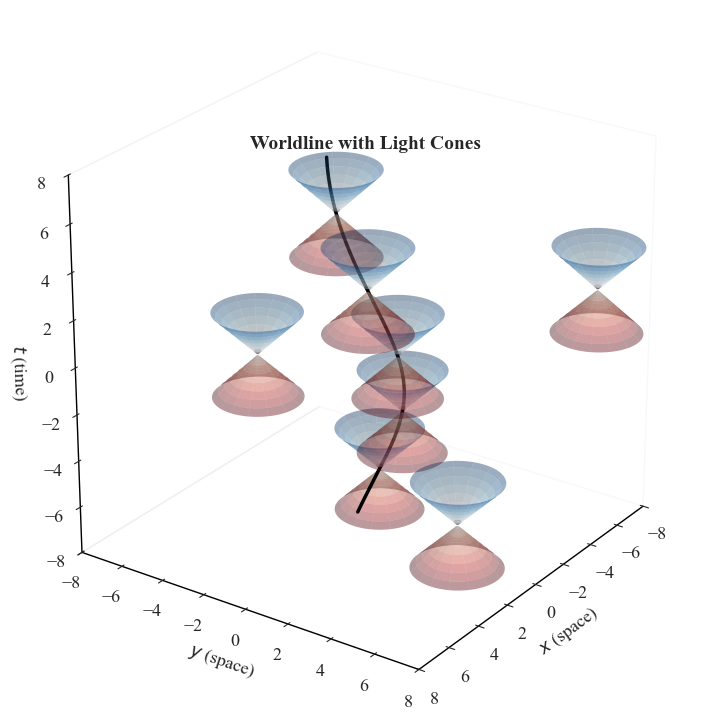

In [33]:
"""LIGHTCONE-AT-EVENT"""

import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# ---------------------------------------------------------------
# Global plot style for academic figures
# ---------------------------------------------------------------
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "font.size": 13,
    "axes.labelsize": 13,
    "axes.titlesize": 15,
    "axes.edgecolor": "black",
    "axes.linewidth": 1.0
})

# ---------------------------------------------------------------
# Helper function to draw a light cone at a given spacetime point
# ---------------------------------------------------------------
def draw_light_cone(ax, center, height=2.5, resolution=60, color='gray', alpha=0.3):
    """Draw a light cone centered at (x0, y0, t0)."""
    t = np.linspace(-height, height, resolution)
    theta = np.linspace(0, 2*np.pi, resolution)
    t_grid, theta_grid = np.meshgrid(t, theta)
    r = np.abs(t_grid)

    t_future = np.where(t_grid >= 0, t_grid, np.nan)
    t_past = np.where(t_grid <= 0, t_grid, np.nan)

    x = r * np.cos(theta_grid) + center[0]
    y = r * np.sin(theta_grid) + center[1]

    z_past = t_past + center[2]
    z_future = t_future + center[2]

    ax.plot_surface(x, y, z_past, rstride=4, cstride=4, alpha=0.4,
    facecolors=cm.Reds((np.abs(t_past) - np.nanmin(np.abs(t_past))) / np.nanmax(np.abs(t_past))),
    linewidth=0, antialiased=True)

    ax.plot_surface(x, y, z_future, rstride=4, cstride=4, alpha=0.4,
    facecolors=cm.Blues((t_future - np.nanmin(t_future)) / np.nanmax(t_future)),
    linewidth=0, antialiased=True)

# ---------------------------------------------------------------
# Create figure and axes
# ---------------------------------------------------------------
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')

# ---------------------------------------------------------------
# Particle worldline (a smooth curve through spacetime)
# ---------------------------------------------------------------
t = np.linspace(-8, 8, 300)
x = 1.5 * np.sin(0.3 * t)
y = 1.5 * np.cos(0.3 * t)
ax.plot(x, y, t, color='black', linewidth=2.5, label='Particle Worldline')

# ---------------------------------------------------------------
# Light cones along the worldline
# ---------------------------------------------------------------
for z0 in np.linspace(-6, 6, 5):
    idx = np.argmin(np.abs(t - z0))
    center = (x[idx], y[idx], t[idx])
    draw_light_cone(ax, center, height=1.8, color='gray', alpha=0.25)

# ---------------------------------------------------------------
# A few cones "outside" the worldline to represent other events
# ---------------------------------------------------------------
external_points = [(4, 7, -4), (-4,8, 3), (3, -3, 0)]
for c in external_points:
    draw_light_cone(ax, c, height=1.8, color='lightgray', alpha=0.2)

# ---------------------------------------------------------------
# Labels and styling
# ---------------------------------------------------------------
ax.text(0, 0, 8.3, 'Worldline with Light Cones', ha='center', fontsize=14, weight='bold')

ax.set_xlabel(r'$x$ (space)')
ax.set_ylabel(r'$y$ (space)')
ax.set_zlabel(r'$t$ (time)')

ax.set_xlim([-8, 8])
ax.set_ylim([-8, 8])
ax.set_zlim([-8, 8])

ax.view_init(elev=25, azim=35)
ax.set_box_aspect([1, 1, 1])

ax.grid(False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# ---------------------------------------------------------------
# Save figure
# ---------------------------------------------------------------
os.makedirs('Ch1', exist_ok=True)
plt.savefig('Ch1/WorldlineCones.svg', format='svg', dpi=300, bbox_inches='tight')
plt.show()
